In [1]:
import random

import numpy as np
import matplotlib.pyplot as plt

from collections import defaultdict
from matplotlib.patches import Rectangle

In [2]:
width = 17
height = 24

half_width = width / 2
half_height = height / 2

print('half width:', half_width)
print('half height:', half_height)

half width: 8.5
half height: 12.0


In [3]:
def is_strike(x, y) -> bool:
    return abs(x) <= 8.5 and abs(y) <= 12

def get_strike_zone_percentage_by_pitch_type(pitches: list, pitch_type: str) -> float:
    pitch_mappings = defaultdict(lambda: { 'strikes': 0, 'total': 0 })
    for pt, x, y in pitches:
        pitch_mappings[pt]['strikes'] += int(is_strike(x, y))
        pitch_mappings[pt]['total'] += 1

    observation = pitch_mappings[pitch_type]
    return round(0.0 if observation['strikes'] == 0 else (observation['strikes'] / observation['total']), 3)

get_strike_zone_percentage_by_pitch_type([
    ['FB', 2.2, -5.8],
    ['SL', 3, 5],
    ['FB', 8.5, -5.8],
    ['FB', -8.5, -5.8],
    ['FB', -8.55, -5.8],
], 'FB')

0.75

In [4]:
possible_x = np.linspace(-13, 13, 1000).tolist()
possible_y = np.linspace(-18, 18, 1000).tolist()

def generate_pitch():
    return (
        random.choice(possible_x),
        random.choice(possible_y),
    )

pitch_sequence = [
    ['FB', *loc]
    for loc in ( generate_pitch() for _ in range(100) )
]

strikes = list(filter(lambda a: is_strike(a[1], a[2]), pitch_sequence))
balls = list(filter(lambda a: not is_strike(a[1], a[2]), pitch_sequence))

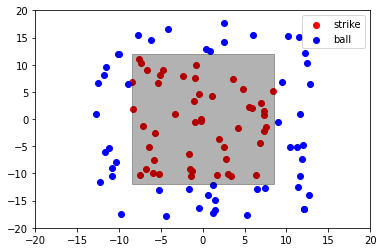

perc of strikes: 0.49


In [5]:
fig, ax = plt.subplots()

ax.scatter([ row[1] for row in strikes ], [ row[2] for row in strikes ], c='r', label='strike')
ax.scatter([ row[1] for row in balls ], [ row[2] for row in balls ], c='b', label='ball')

ax.add_patch(Rectangle((-8.5, -12), 17, 24, alpha=0.3, color='k'))

plt.xlim(-20, 20)
plt.ylim(-20, 20)

plt.legend()
plt.show()

print('perc of strikes:', get_strike_zone_percentage_by_pitch_type(pitch_sequence, 'FB'))